<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/Typhoon_Phase5_ANN(new_data_2023_04_11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

cv = LeaveOneOut()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   
%cd /content/drive/My Drive/8.Colab Notebooks/2023.02.09 Typhoon2/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/8.Colab Notebooks/2023.02.09 Typhoon2


In [ ]:
import os
directory = 'path'
for filename in os.listdir(directory):
    # Check if the file has a .txt extension
    if filename.endswith('.txt'):
        # Print the file name
        print(filename)

AAO_Reanalysis.txt
AMO_Reanalysis.txt
AO_msl_Reanalysis.txt
EMI_Reanalysis.txt
GMT_Reanalysis.txt
NINO3_Reanalysis.txt
NINO4_Reanalysis.txt
NINO34_Reanalysis.txt
PDO_Reanalysis.txt
PNA_Reanalysis.txt
QBO_Reanalysis.txt


In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import datetime

scaler = StandardScaler()

directory = 'path'

df_list = []

# Loop through all files in the directory
for filename in os.listdir(directory):
  if filename.endswith(".txt"):
      filepath = os.path.join(directory, filename)
      with open(filepath) as f:
          lines = [line.split() for line in f]
      data = []
      for line in lines:
          year = int(line[0])
          values = [float(x) for x in line[1:]]
          row_dict = {'year': year}
          for i, value in enumerate(values):  
             month = i + 1
             month_name = pd.Timestamp(year=2000, month=month, day=1).strftime('%B').lower()
             month_name = datetime.datetime.strptime(month_name, "%B").month
             row_dict[month_name] = value
          data.append(row_dict)
    # create the DataFrame
      df = pd.DataFrame(data)
      df = df.melt(id_vars=['year'], var_name='month', value_name=filename.replace('.txt', ''))
      df = df.sort_values(['year', 'month'])
      column_name = filename.replace('.txt', '')
      df[column_name] = scaler.fit_transform(df[column_name].values.reshape(-1, 1))
      df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
rawdata_df = pd.concat(df_list, ignore_index=True)

# Group by year and month and aggregate values
rawdata_df = rawdata_df.groupby(['year', 'month']).mean().reset_index()

# Fill missing values with 0 if needed
# rawdata_df = rawdata_df.fillna(0)

rawdata_df

,year,month,AAO_Reanalysis,AMO_Reanalysis,AO_msl_Reanalysis,EMI_Reanalysis,GMT_Reanalysis,NINO3_Reanalysis,NINO4_Reanalysis,NINO34_Reanalysis,PDO_Reanalysis,PNA_Reanalysis,QBO_Reanalysis
0,1854,1,NaN,1.408989,NaN,-0.316023,NaN,0.065001,-0.392995,-0.435995,0.106996,NaN,NaN
1,1854,2,NaN,2.092984,NaN,0.539980,NaN,-0.033000,0.003005,-0.441995,0.061996,NaN,NaN
2,1854,3,NaN,1.578988,NaN,0.978981,NaN,-0.086000,0.412004,0.017005,0.234996,NaN,NaN
3,1854,4,NaN,1.139991,NaN,0.931981,NaN,0.074001,0.471004,0.354005,0.155996,NaN,NaN
4,1854,5,NaN,0.234998,NaN,0.583980,NaN,0.210002,0.681004,0.479005,-0.220005,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2021,8,-0.124464,1.033992,0.104003,-0.524024,1.668996,-0.616004,-0.267995,-0.631995,-0.385005,-0.080997,-0.619995
2012,2021,9,-1.726965,1.534988,-0.612989,-0.654025,1.932995,-0.651005,-0.783994,-0.702995,-1.249005,-0.039997,-0.827994
2013,2021,10,-0.894742,1.637987,-0.526990,-0.840025,2.070995,-0.988007,-1.073994,-1.079994,-2.306006,-0.392996,-1.027993
2014,2021,11,-1.793560,1.619988,-0.065995,-0.670025,1.916995,-1.338010,-1.081994,-1.160994,-2.050005,0.852000,-1.167992


In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import datetime

scaler = StandardScaler()

directory2 = 'country'

df2_list = []

# Loop through all files in the directory2
for filename in os.listdir(directory2):
  if filename.endswith(".txt"):
      filepath = os.path.join(directory2, filename)
      with open(filepath) as f:
          lines = [line.split() for line in f]
      data2 = []
      for line in lines:
          year = int(line[0])
          values = [float(x) if x != '-9' else 0 for x in line[1:]]
          row_dict = {'year': year}
          for i, value in enumerate(values):  
             month = i + 1
             month_name = pd.Timestamp(year=2000, month=month, day=1).strftime('%B').lower()
             month_name = datetime.datetime.strptime(month_name, "%B").month
             row_dict[month_name] = value
          data2.append(row_dict)
    # create the DataFrame
      df2 = pd.DataFrame(data2)
      df2 = df2.melt(id_vars=['year'], var_name='month', value_name=filename.replace('.txt', ''))
      df2 = df2.sort_values(['year', 'month'])
      column_name = filename.replace('.txt', '')
      #df2[column_name] = scaler.fit_transform(df2[column_name].values.reshape(-1, 1))
      df2_list.append(df2)

# Concatenate all DataFrames in the list into a single DataFrame
result_df = pd.concat(df2_list, ignore_index=True)

# Group by year and month and aggregate values
result_df = result_df.groupby(['year', 'month']).mean().reset_index()

result_df = result_df.rename(columns={'Mexico_TC_freq_NHC-ENP': 'Mexic2_TC_freq_NHC-ENP'})
result_df = result_df.rename(columns={'Mexico_TC_landfall_intensity_NHC-ENP': 'Mexic2_TC_landfall_intensity_NHC-ENP'})
result_df = result_df.rename(columns={'US_TC_freq_NHC-ENP': 'U2_TC_freq_NHC-ENP'})
result_df = result_df.rename(columns={'US_TC_landfall_intensity_NHC-ENP': 'U2_TC_landfall_intensity_NHC-ENP'})
result_df.columns = map(str.lower, result_df.columns)
# Fill missing values with 0 if neederesult# merged_df2 = merged_df2.fillna(0)
pd.options.display.max_columns = None
result_df

,year,month,korea_tc_freq_jtwc-wnp,japan_tc_freq_jtwc-wnp,korea_tc_landfall_intensity_jtwc-wnp,japan_tc_landfall_intensity_jtwc-wnp,taiwan_tc_freq_jtwc-wnp,taiwan_tc_landfall_intensity_jtwc-wnp,china_tc_freq_jtwc-wnp,china_tc_landfall_intensity_jtwc-wnp,vietnam_tc_freq_jtwc-wnp,vietnam_tc_landfall_intensity_jtwc-wnp,phili_tc_freq_jtwc-wnp,phili_tc_landfall_intensity_jtwc-wnp,u2_tc_freq_nhc-enp,u2_tc_landfall_intensity_nhc-enp,mexic2_tc_freq_nhc-enp,mexic2_tc_landfall_intensity_nhc-enp,us_tc_freq_nhc-nat,us_tc_landfall_intensity_nhc-nat,mexico_tc_freq_nhc-nat,mexico_tc_landfall_intensity_nhc-nat,carribean_tc_freq_nhc-nat,carribean_tc_landfall_intensity_nhc-nat,sri_tc_freq_jtwc-nio,sri_tc_landfall_intensity_jtwc-nio,india_tc_freq_jtwc-nio,india_tc_landfall_intensity_jtwc-nio,pakistan_tc_freq_jtwc-nio,pakistan_tc_landfall_intensity_jtwc-nio,bangla_tc_freq_jtwc-nio,bangla_tc_landfall_intensity_jtwc-nio,myanmar_tc_freq_jtwc-nio,myanmar_tc_landfall_intensity_jtwc-nio,madagascar_tc_freq_jtwc-sh,madagascar_tc_landfall_intensity_jtwc-sh,austrailia_tc_freq_jtwc-sh,austrailia_tc_landfall_intensity_jtwc-sh
0,1959,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1959,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1959,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1959,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1959,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0,1.0,25.0,1.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2021,8,1.0,4.0,26.0,32.0,1.0,45.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,40.0,3.0,64.0,1.0,70.0,3.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
752,2021,9,1.0,1.0,55.0,42.0,1.0,148.0,1.0,105.0,2.0,36.0,2.0,78.0,0.0,0.0,1.0,25.0,3.0,35.0,1.0,35.0,1.0,39.0,0.0,0.0,1.0,40.0,1.0,25.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0
753,2021,10,0.0,1.0,0.0,78.0,0.0,0.0,2.0,42.0,2.0,36.0,1.0,48.0,0.0,0.0,2.0,67.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
754,2021,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
column_titles = list(result_df.columns)
column_titles.remove('year')
column_titles.remove('month')
column_titles.sort()
column_titles

['austrailia_tc_freq_jtwc-sh',
 'austrailia_tc_landfall_intensity_jtwc-sh',
 'bangla_tc_freq_jtwc-nio',
 'bangla_tc_landfall_intensity_jtwc-nio',
 'carribean_tc_freq_nhc-nat',
 'carribean_tc_landfall_intensity_nhc-nat',
 'china_tc_freq_jtwc-wnp',
 'china_tc_landfall_intensity_jtwc-wnp',
 'india_tc_freq_jtwc-nio',
 'india_tc_landfall_intensity_jtwc-nio',
 'japan_tc_freq_jtwc-wnp',
 'japan_tc_landfall_intensity_jtwc-wnp',
 'korea_tc_freq_jtwc-wnp',
 'korea_tc_landfall_intensity_jtwc-wnp',
 'madagascar_tc_freq_jtwc-sh',
 'madagascar_tc_landfall_intensity_jtwc-sh',
 'mexic2_tc_freq_nhc-enp',
 'mexic2_tc_landfall_intensity_nhc-enp',
 'mexico_tc_freq_nhc-nat',
 'mexico_tc_landfall_intensity_nhc-nat',
 'myanmar_tc_freq_jtwc-nio',
 'myanmar_tc_landfall_intensity_jtwc-nio',
 'pakistan_tc_freq_jtwc-nio',
 'pakistan_tc_landfall_intensity_jtwc-nio',
 'phili_tc_freq_jtwc-wnp',
 'phili_tc_landfall_intensity_jtwc-wnp',
 'sri_tc_freq_jtwc-nio',
 'sri_tc_landfall_intensity_jtwc-nio',
 'taiwan_tc_freq_j

In [ ]:
country_codes = {
    'austrailia': 0,
    'bangla': 1,
    'carribean': 2,
    'china': 3,
    'india': 4,
    'japan': 5,
    'korea': 6,
    'madagascar': 7,
    'mexic2': 8,
    'mexico': 9,
    'myanmar': 10,
    'phili': 11,
    'pakistan': 12,
    'sri': 13,
    'taiwan': 14,
    'u2': 15,
    'us': 16,
    'vietnam': 17,
}

In [ ]:
result_dfs = []

for col in column_titles:

    for key in country_codes.keys():
        if key in col.lower():
            country = country_codes[key]
            break
    else:
        country = None

    # Add the 'country' column to result_df
    result_df['country'] = country
    result_df['name'] = key

    # Check if the selected column name contains 'freq' or 'intensity', and replace the entire column name with either 'freq' or 'intensity' accordingly
    if 'freq' in col.lower():
        new_column_name = 'freq'
    elif 'intensity' in col.lower():
        new_column_name = 'intensity'
    else:
        new_column_name = col

    # Get the years without nan values for the selected country
    years = result_df[result_df[col].notna()]['year'].unique()

    # Filter dataframe A for the selected country and years
    x = rawdata_df[rawdata_df['year'].isin(years)]

    # Filter dataframe B for the selected country and years, and rename the selected column
    y = result_df[['year', 'month', 'country', 'name', col]][result_df[col].notna() & result_df['year'].isin(years)].rename(columns={col: new_column_name})

    xy = pd.merge(x, y, on=['year', 'month'])
    result_dfs.append(xy)

alldfs = pd.concat(result_dfs, ignore_index=True)
alldfs


# one-hot encoding using pandas.get_dummies() method
one_hot = pd.get_dummies(alldfs['country'])

# concatenate the one-hot encoded dataframe with the original dataframe
alldfs = pd.concat([alldfs, one_hot], axis=1)

# drop the original 'country' column
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('freq')))
alldfs = alldfs[cols]
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('intensity')))
alldfs = alldfs[cols]
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('country')))
alldfs = alldfs[cols]
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('name')))
alldfs = alldfs[cols]
alldfs

,year,month,AAO_Reanalysis,AMO_Reanalysis,AO_msl_Reanalysis,EMI_Reanalysis,GMT_Reanalysis,NINO3_Reanalysis,NINO4_Reanalysis,NINO34_Reanalysis,PDO_Reanalysis,PNA_Reanalysis,QBO_Reanalysis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,freq,intensity,country,name
0,1991,1,-0.941385,-1.573988,0.694996,2.039985,0.332999,0.103001,1.192004,0.604005,-1.199005,-0.476996,0.925998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
1,1991,2,0.626454,-1.286990,-0.228994,2.012985,0.499999,-0.032000,1.147004,0.453005,-0.586005,0.891000,0.949998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,0,austrailia
2,1991,3,-0.431124,-1.333990,-0.238993,1.540983,-0.041000,-0.144001,0.825004,0.155005,-0.451005,-1.266993,0.837999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
3,1991,4,0.497968,-1.966985,1.088992,1.340983,0.377999,0.096001,0.870004,0.423005,-0.950005,0.417001,0.329001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
4,1991,5,1.212183,-2.141983,0.525998,1.418983,0.132000,0.422004,1.003004,0.467005,-0.984005,-0.209997,-0.295996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24235,2021,8,-0.124464,1.033992,0.104003,-0.524024,1.668996,-0.616004,-0.267995,-0.631995,-0.385005,-0.080997,-0.619995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0.0,17,vietnam
24236,2021,9,-1.726965,1.534988,-0.612989,-0.654025,1.932995,-0.651005,-0.783994,-0.702995,-1.249005,-0.039997,-0.827994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,36.0,17,vietnam
24237,2021,10,-0.894742,1.637987,-0.526990,-0.840025,2.070995,-0.988007,-1.073994,-1.079994,-2.306006,-0.392996,-1.027993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,36.0,17,vietnam
24238,2021,11,-1.793560,1.619988,-0.065995,-0.670025,1.916995,-1.338010,-1.081994,-1.160994,-2.050005,0.852000,-1.167992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0.0,17,vietnam


In [ ]:
freqdf = alldfs.drop(columns=['intensity'])
freqdf = freqdf.dropna().reset_index(drop=True)
freqdf

,year,month,AAO_Reanalysis,AMO_Reanalysis,AO_msl_Reanalysis,EMI_Reanalysis,GMT_Reanalysis,NINO3_Reanalysis,NINO4_Reanalysis,NINO34_Reanalysis,PDO_Reanalysis,PNA_Reanalysis,QBO_Reanalysis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,freq,country,name
0,1991,1,-0.941385,-1.573988,0.694996,2.039985,0.332999,0.103001,1.192004,0.604005,-1.199005,-0.476996,0.925998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
1,1991,2,0.626454,-1.286990,-0.228994,2.012985,0.499999,-0.032000,1.147004,0.453005,-0.586005,0.891000,0.949998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,austrailia
2,1991,3,-0.431124,-1.333990,-0.238993,1.540983,-0.041000,-0.144001,0.825004,0.155005,-0.451005,-1.266993,0.837999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
3,1991,4,0.497968,-1.966985,1.088992,1.340983,0.377999,0.096001,0.870004,0.423005,-0.950005,0.417001,0.329001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
4,1991,5,1.212183,-2.141983,0.525998,1.418983,0.132000,0.422004,1.003004,0.467005,-0.984005,-0.209997,-0.295996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,2021,8,-0.124464,1.033992,0.104003,-0.524024,1.668996,-0.616004,-0.267995,-0.631995,-0.385005,-0.080997,-0.619995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,17,vietnam
12116,2021,9,-1.726965,1.534988,-0.612989,-0.654025,1.932995,-0.651005,-0.783994,-0.702995,-1.249005,-0.039997,-0.827994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,17,vietnam
12117,2021,10,-0.894742,1.637987,-0.526990,-0.840025,2.070995,-0.988007,-1.073994,-1.079994,-2.306006,-0.392996,-1.027993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,17,vietnam
12118,2021,11,-1.793560,1.619988,-0.065995,-0.670025,1.916995,-1.338010,-1.081994,-1.160994,-2.050005,0.852000,-1.167992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,17,vietnam


In [ ]:
intendf = alldfs.drop(columns=['freq'])
intendf = intendf.dropna().reset_index(drop=True)
intendf

,year,month,AAO_Reanalysis,AMO_Reanalysis,AO_msl_Reanalysis,EMI_Reanalysis,GMT_Reanalysis,NINO3_Reanalysis,NINO4_Reanalysis,NINO34_Reanalysis,PDO_Reanalysis,PNA_Reanalysis,QBO_Reanalysis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,intensity,country,name
0,1991,1,-0.941385,-1.573988,0.694996,2.039985,0.332999,0.103001,1.192004,0.604005,-1.199005,-0.476996,0.925998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
1,1991,2,0.626454,-1.286990,-0.228994,2.012985,0.499999,-0.032000,1.147004,0.453005,-0.586005,0.891000,0.949998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,austrailia
2,1991,3,-0.431124,-1.333990,-0.238993,1.540983,-0.041000,-0.144001,0.825004,0.155005,-0.451005,-1.266993,0.837999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
3,1991,4,0.497968,-1.966985,1.088992,1.340983,0.377999,0.096001,0.870004,0.423005,-0.950005,0.417001,0.329001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
4,1991,5,1.212183,-2.141983,0.525998,1.418983,0.132000,0.422004,1.003004,0.467005,-0.984005,-0.209997,-0.295996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,2021,8,-0.124464,1.033992,0.104003,-0.524024,1.668996,-0.616004,-0.267995,-0.631995,-0.385005,-0.080997,-0.619995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,17,vietnam
12116,2021,9,-1.726965,1.534988,-0.612989,-0.654025,1.932995,-0.651005,-0.783994,-0.702995,-1.249005,-0.039997,-0.827994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36.0,17,vietnam
12117,2021,10,-0.894742,1.637987,-0.526990,-0.840025,2.070995,-0.988007,-1.073994,-1.079994,-2.306006,-0.392996,-1.027993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36.0,17,vietnam
12118,2021,11,-1.793560,1.619988,-0.065995,-0.670025,1.916995,-1.338010,-1.081994,-1.160994,-2.050005,0.852000,-1.167992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,17,vietnam


In [ ]:
# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model for predicting y1
model_1 = Sequential()
model_1.add(Dense(64, input_dim=30, activation="relu"))
model_1.add(Dense(32, activation="relu"))
model_1.add(Dense(1, activation="linear"))
model_1.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y1 and y2

y1_preds = []
y1_actuals = []
y1_test_country = []
y1_test_month = []
y1_test_year = []

# examption : 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15,'bangla' : 1
freqdf = freqdf[~freqdf['country'].isin([1, 10, 12, 13])].reset_index(drop=True)

#freqdf = freqdf[freqdf['country'] == 13].reset_index(drop=True)
#intendf = intendf[intendf['country'] == 13].reset_index(drop=True)

# Loop over each year and perform LOOCV
for year in range(1959, 2022):
    # Split the data into training and test sets based on the year
    freqdf_x1_train = freqdf[freqdf['year'] != year].iloc[:,1:31]
    freqdf_x1_test = freqdf[freqdf['year'] == year].iloc[:,1:31]
    freqdf_y1_train = freqdf[freqdf['year'] != year].iloc[:,[0, 1, 33, 31]]
    freqdf_y1_test = freqdf[freqdf['year'] == year].iloc[:,[0, 1, 33, 31]]

    # Train the model on the training set
    model_1.fit(freqdf_x1_train, freqdf_y1_train.iloc[:,3], epochs=100, batch_size=32, verbose=0)

    # Predict the output for the test set
    y1_pred = model_1.predict(freqdf_x1_test)

    # Add the predictions and actual values to the respective lists
    y1_preds.extend(y1_pred)
    y1_actuals.extend(freqdf_y1_test.iloc[:,3].values)
    y1_test_year.extend(freqdf_y1_test.iloc[:,0].values)
    y1_test_month.extend(freqdf_y1_test.iloc[:,1].values)
    y1_test_country.extend(freqdf_y1_test.iloc[:,2].values)

# Convert predictions to DataFrame and concatenate with country and month columns
y1_pred_df = pd.DataFrame({"year": y1_test_year, "month": y1_test_month, "country": y1_test_country, "y1_pred": np.squeeze(y1_preds),"y1_actual": y1_actuals})
y1_pred_df = y1_pred_df[['year', 'month', 'country', 'y1_pred', 'y1_actual']]

# Save predictions to CSV file
y1_pred_df.to_csv('y_pred_ANN_freq7.csv', index=False)

import pickle

# 모델 저장
with open('model_N.pkl', 'wb') as f:
    pickle.dump(model_1, f)

# 모델 불러오기
with open('model_N.pkl', 'rb') as f:
    model_N_loaded = pickle.load(f)

6/6 [==============================] - 0s 4ms/step


RMSE for y1: 1.5016418183318843
Correlation for y1: 0.8009856464998335


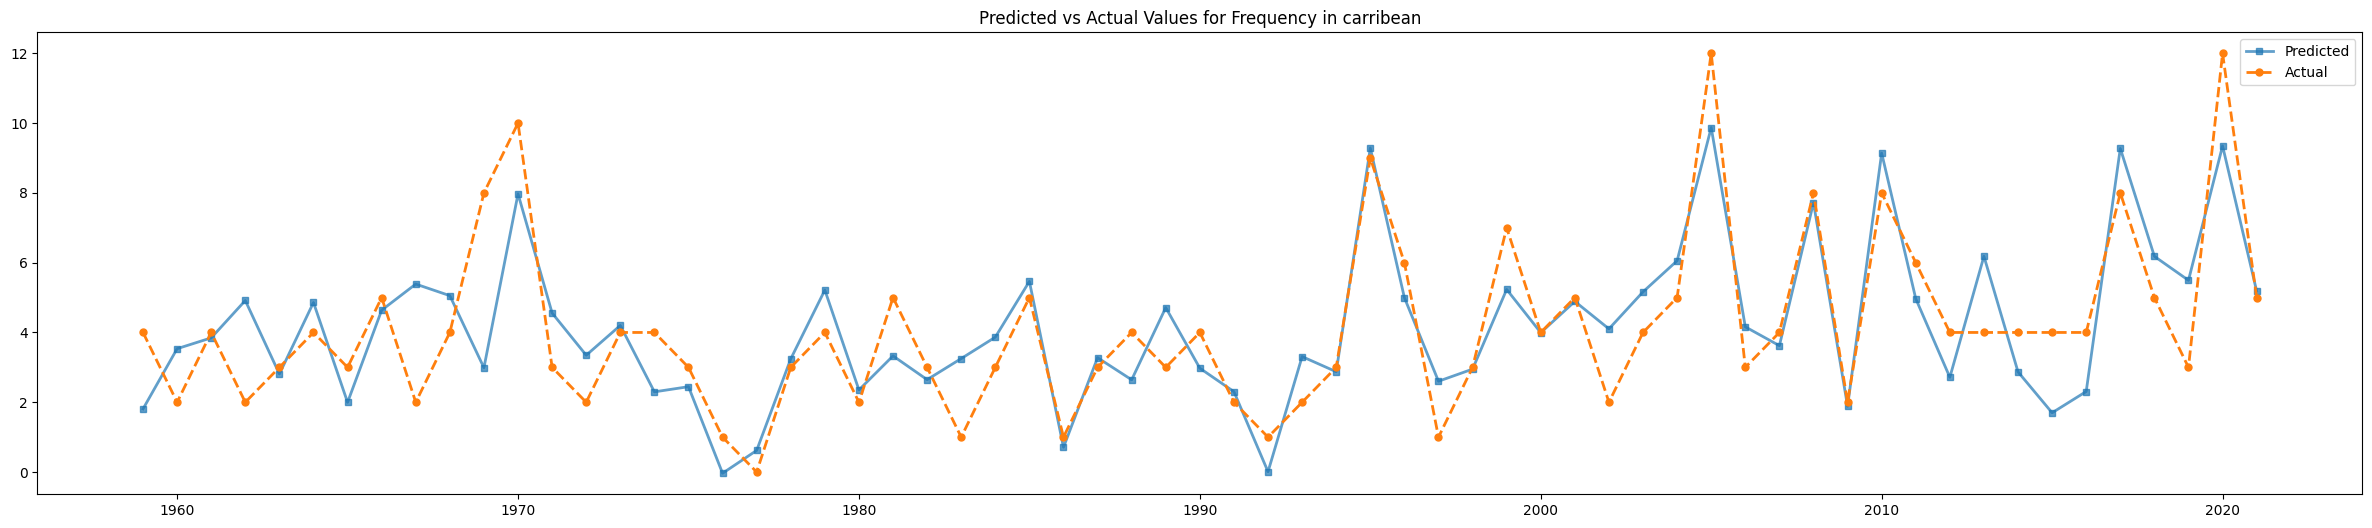

RMSE for y1: 1.7423839579694556
Correlation for y1: 0.7448191009679782


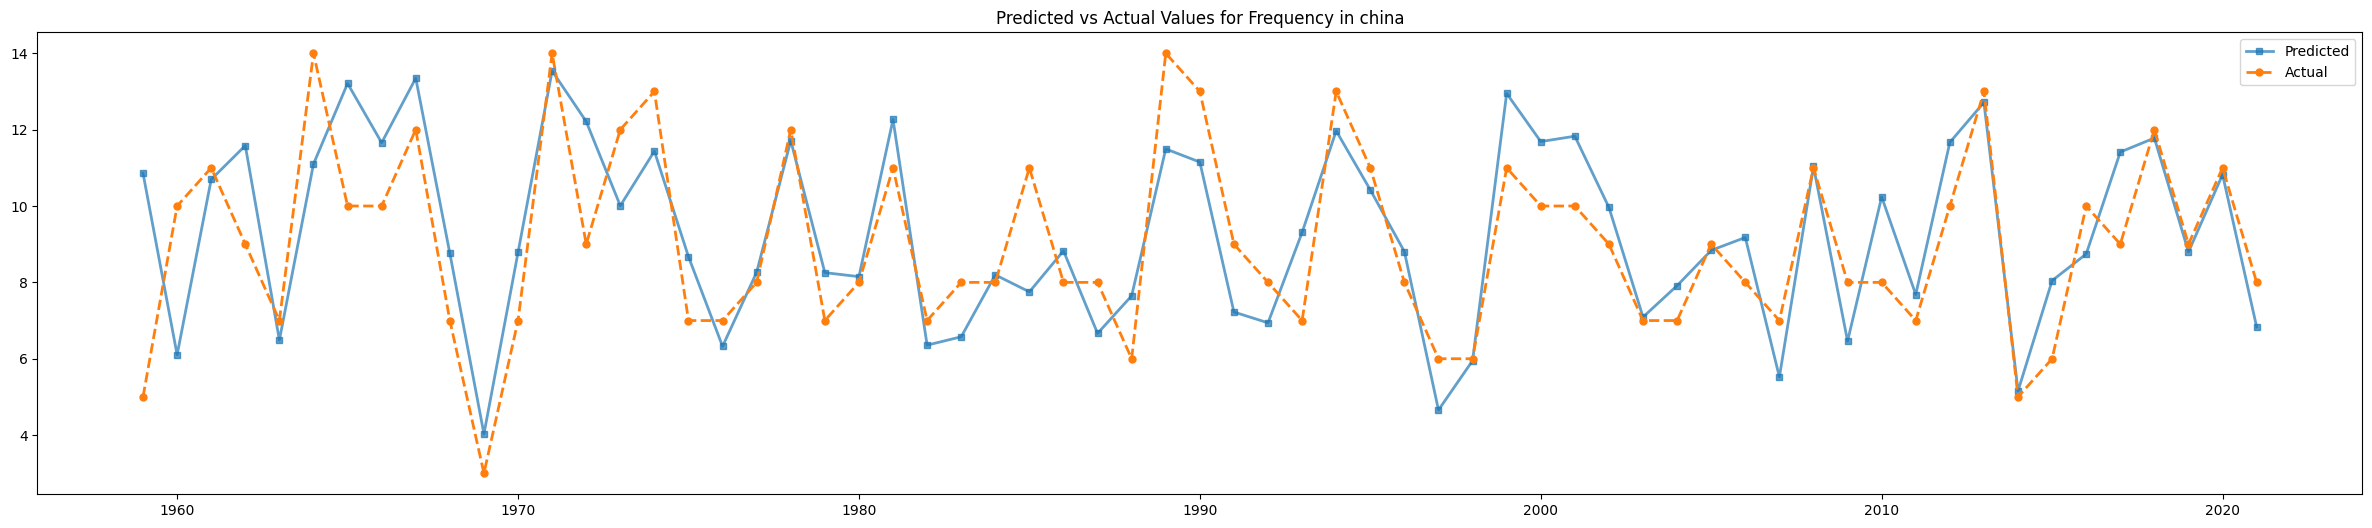

RMSE for y1: 1.2609146405562546
Correlation for y1: 0.8236025181227533


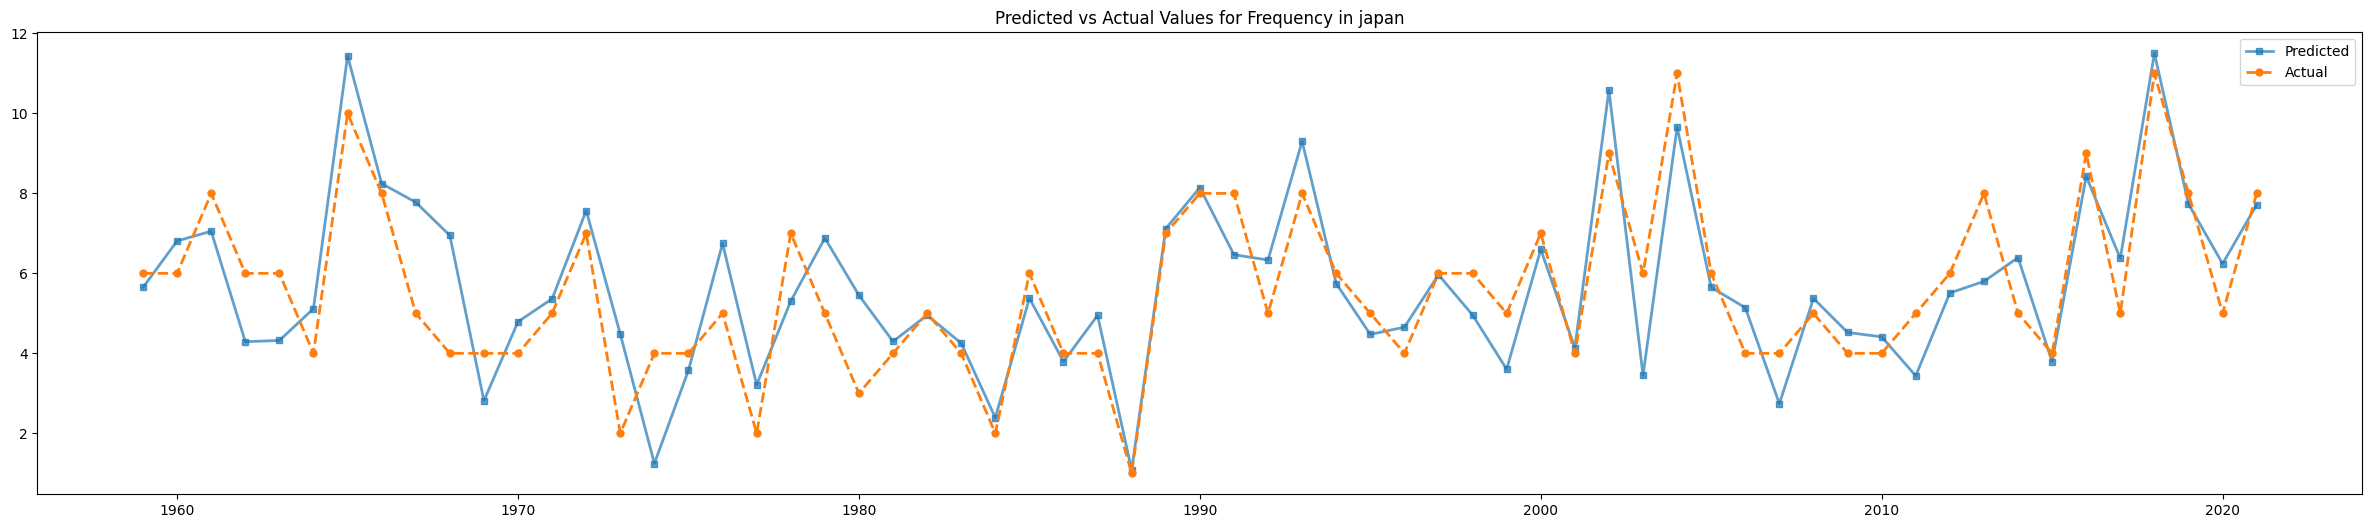

RMSE for y1: 0.9448705386226198
Correlation for y1: 0.8097992004463502


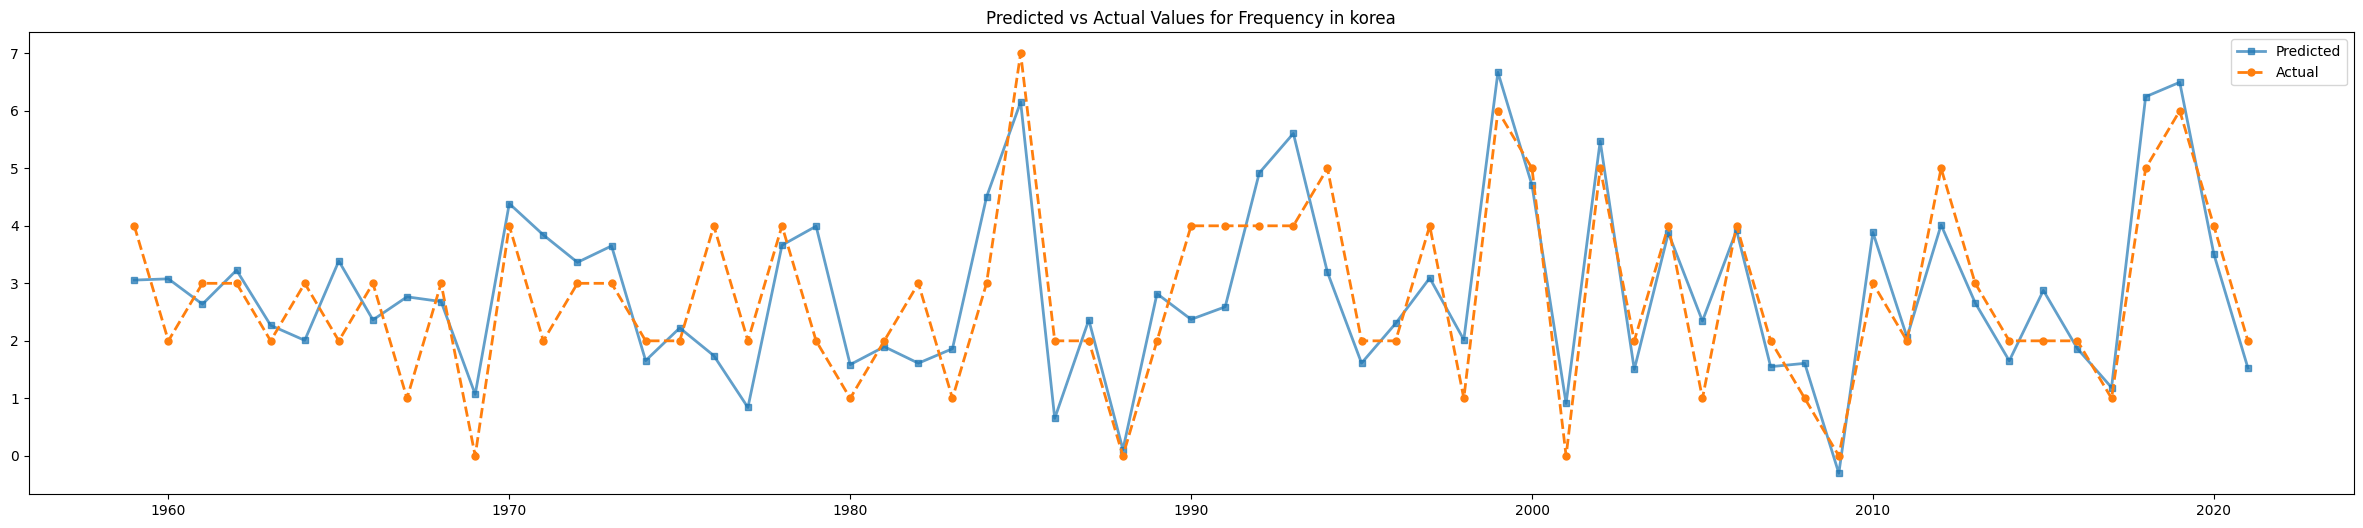

RMSE for y1: 1.4409188762166847
Correlation for y1: 0.7972462628366995


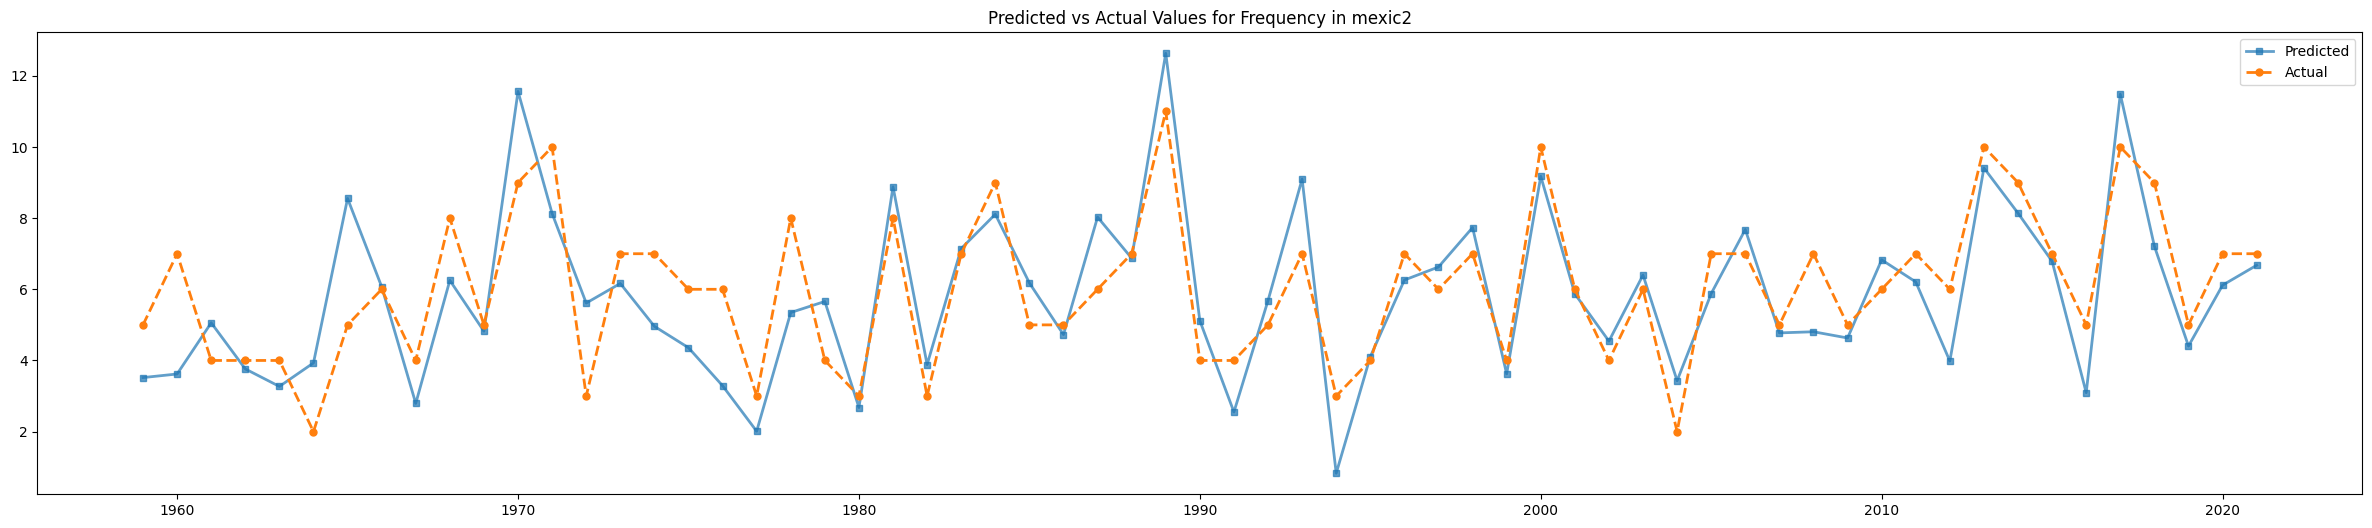

RMSE for y1: 1.3199031348165706
Correlation for y1: 0.7813836145279438


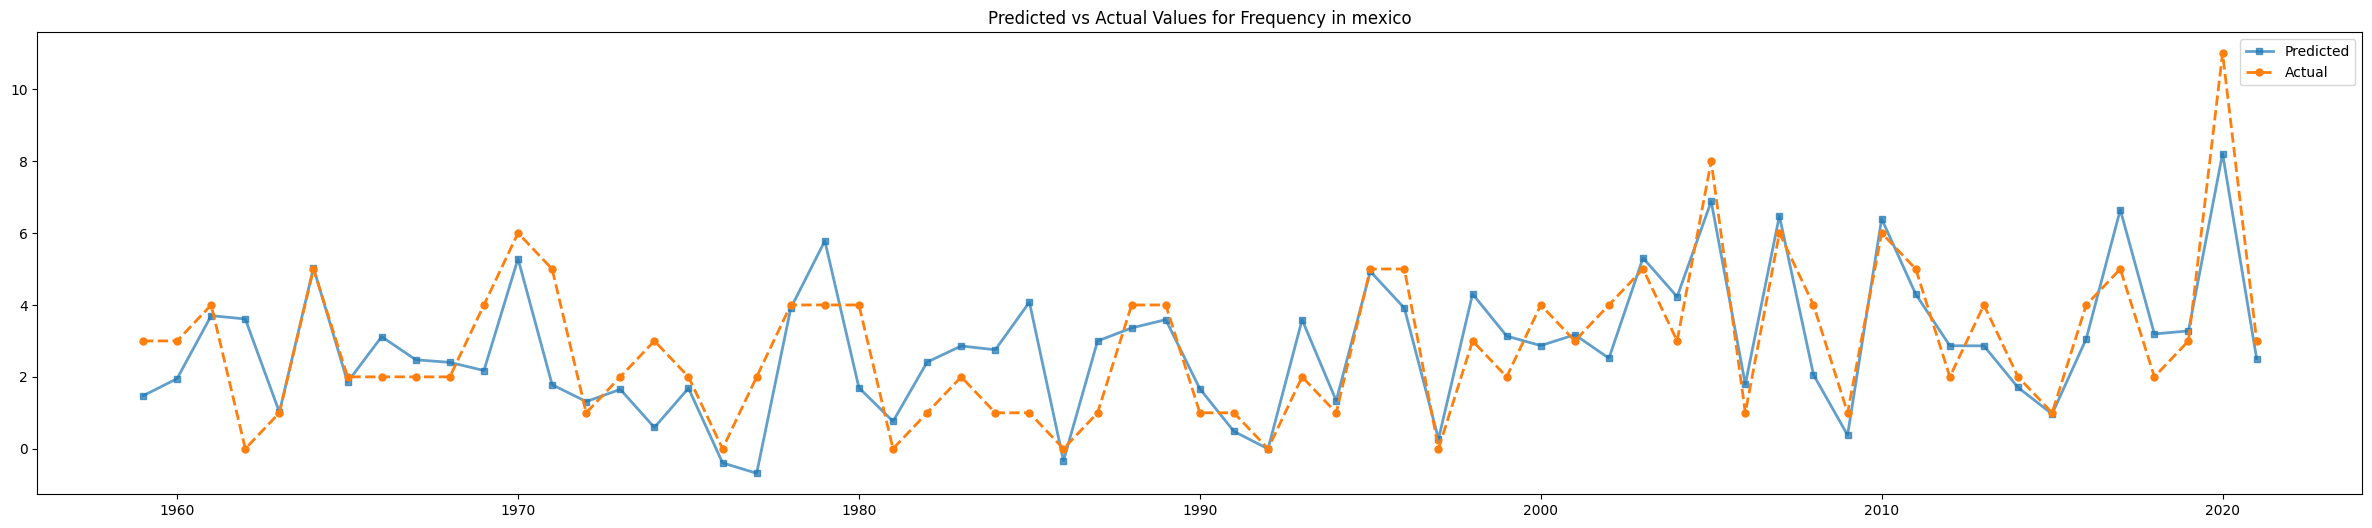

RMSE for y1: 1.7907425920431956
Correlation for y1: 0.8155892845765812


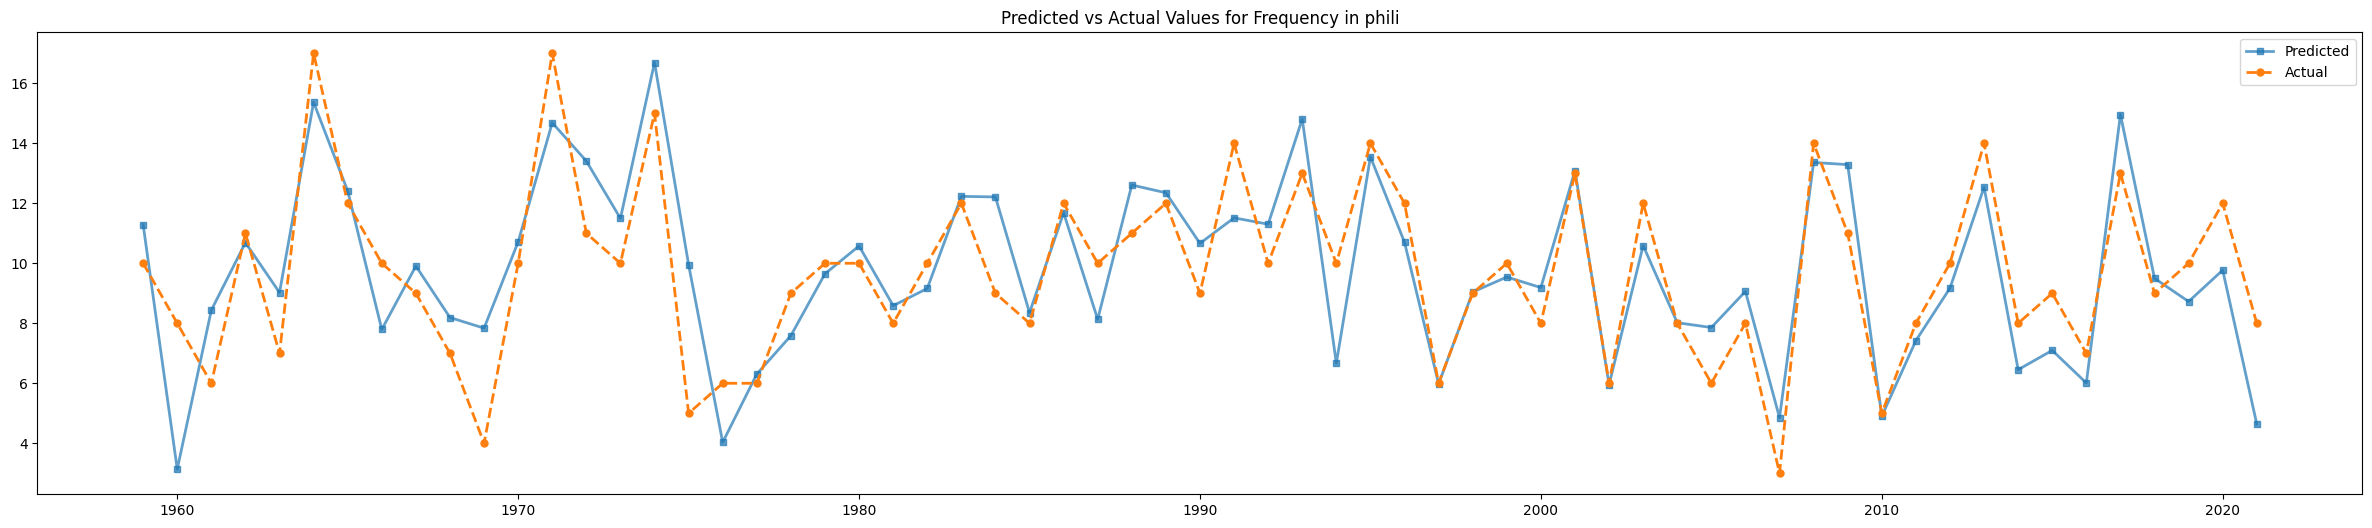

RMSE for y1: 1.359858798432861
Correlation for y1: 0.6882943432804737


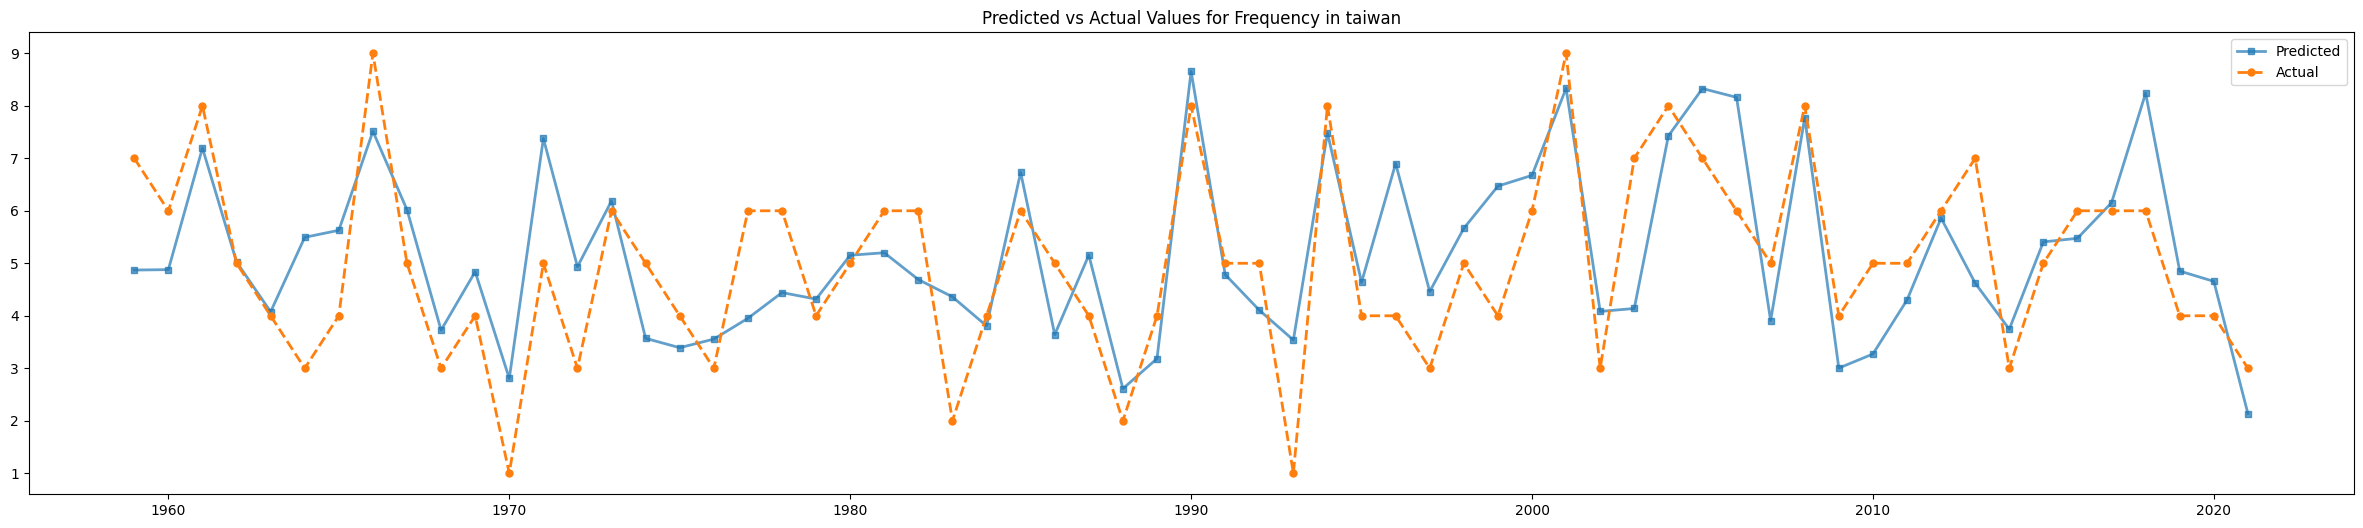

RMSE for y1: 0.8908668337113416
Correlation for y1: 0.5551152594600399


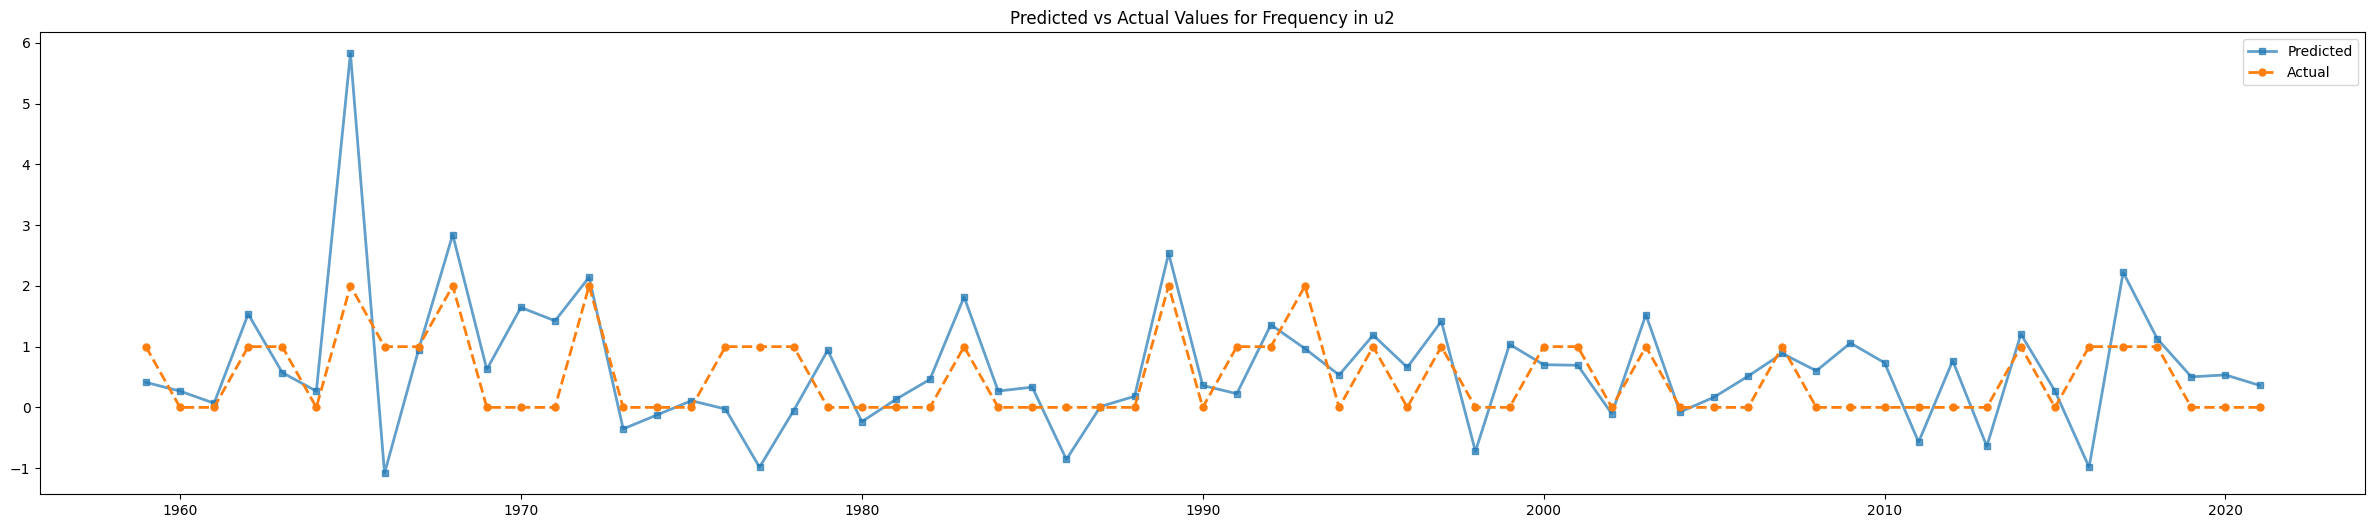

RMSE for y1: 1.5342275078162015
Correlation for y1: 0.8206913107943228


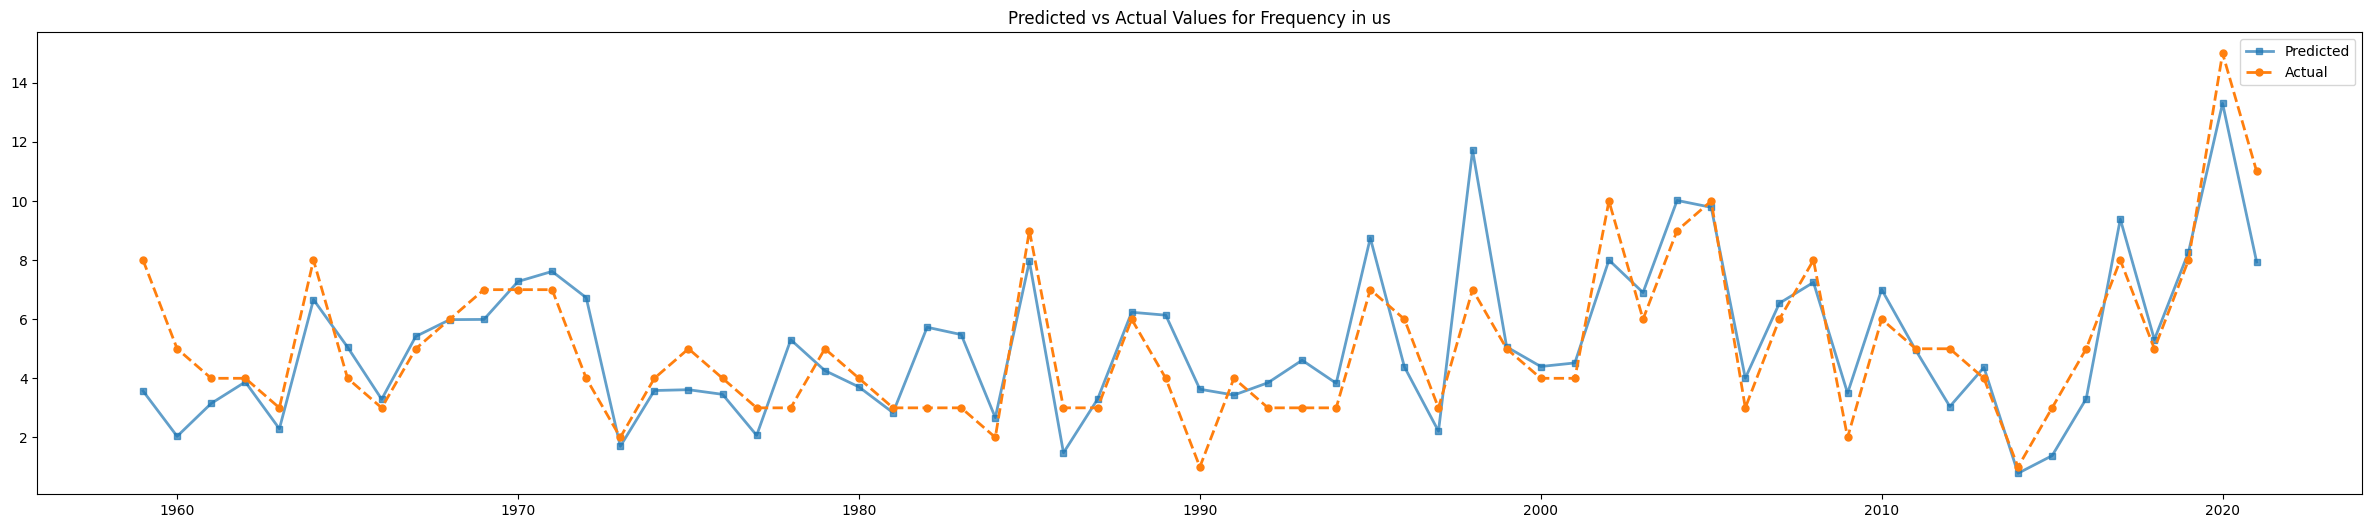

RMSE for y1: 1.70172773169417
Correlation for y1: 0.7516275582009746


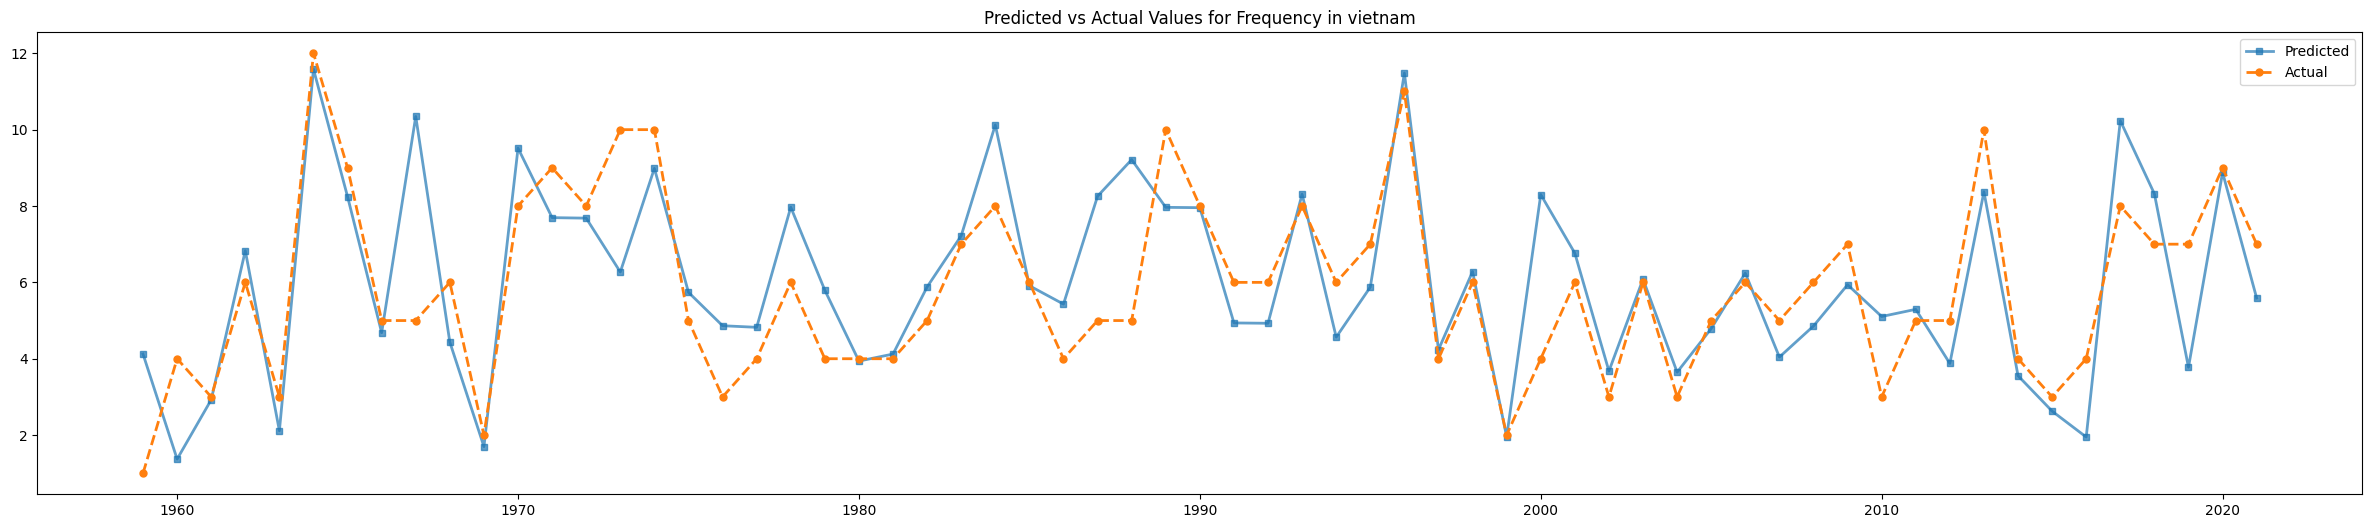

RMSE for y1: 1.10642139072458
Correlation for y1: 0.3743260015841517


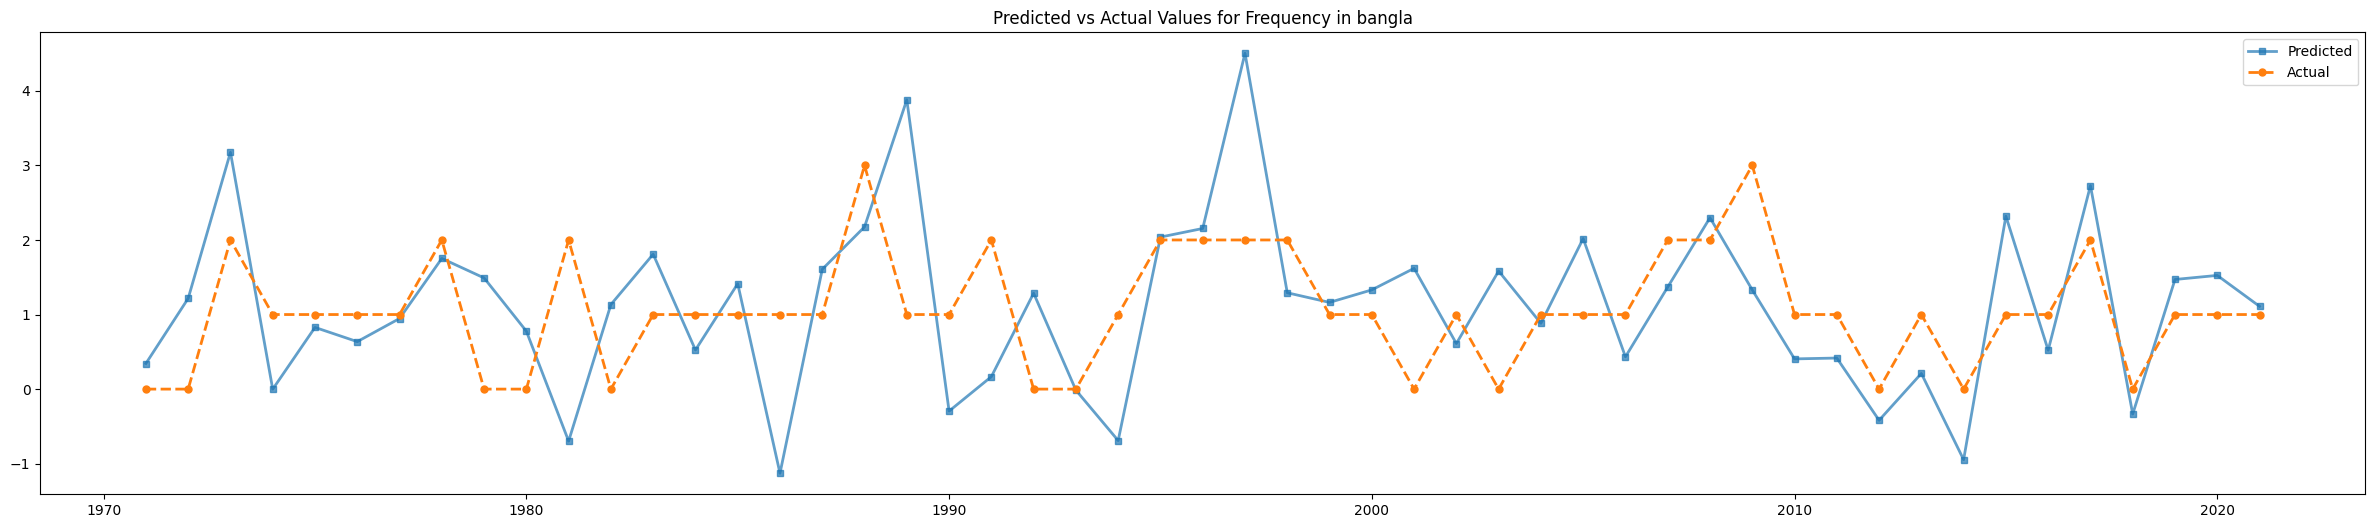

RMSE for y1: 1.483762074275091
Correlation for y1: 0.5657130122692088


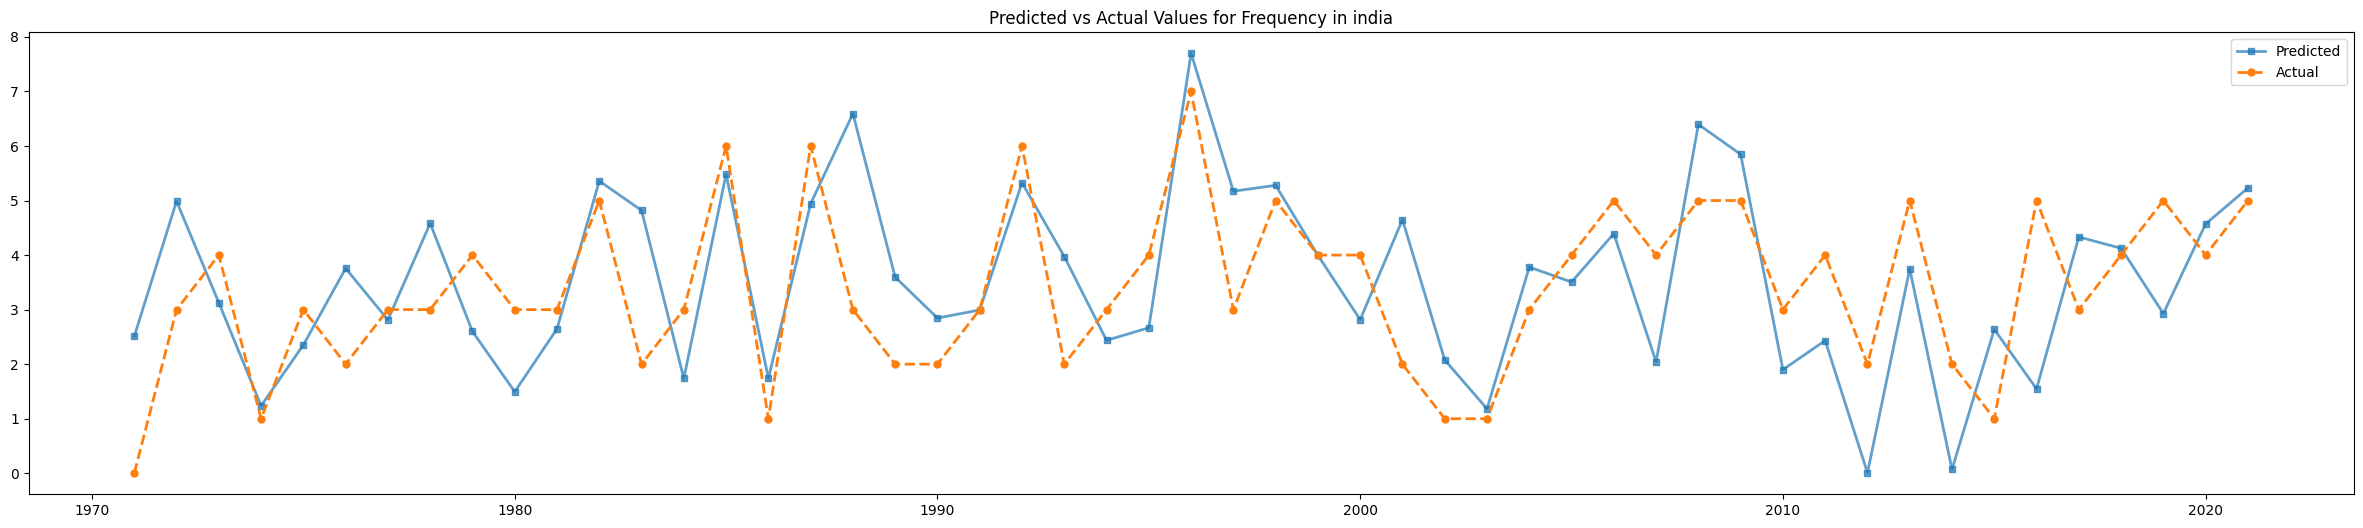

RMSE for y1: 1.6280572808136933
Correlation for y1: 0.5047671283614357


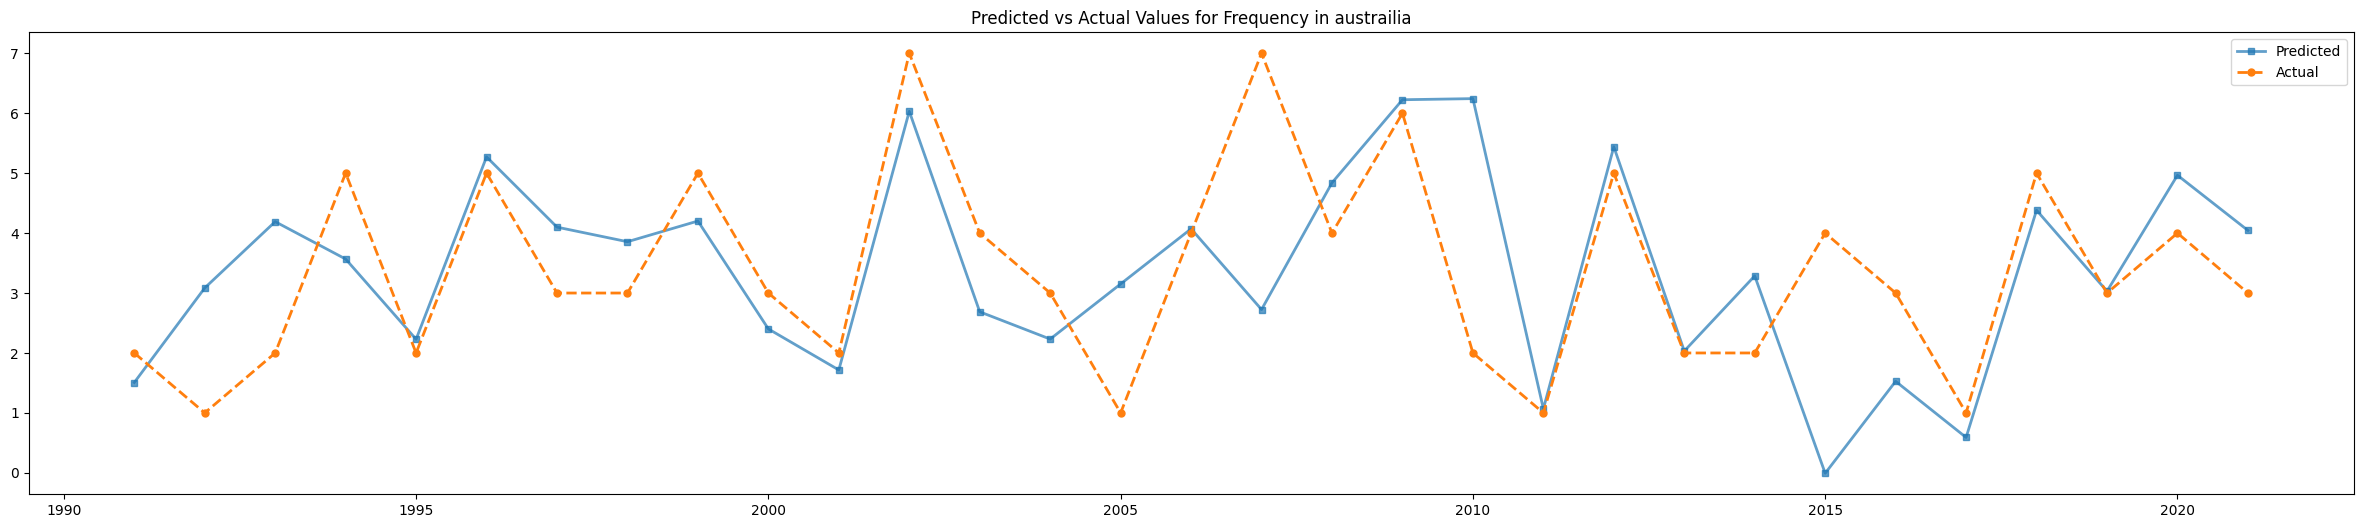

RMSE for y1: 1.335322081882133
Correlation for y1: 0.859140990027729


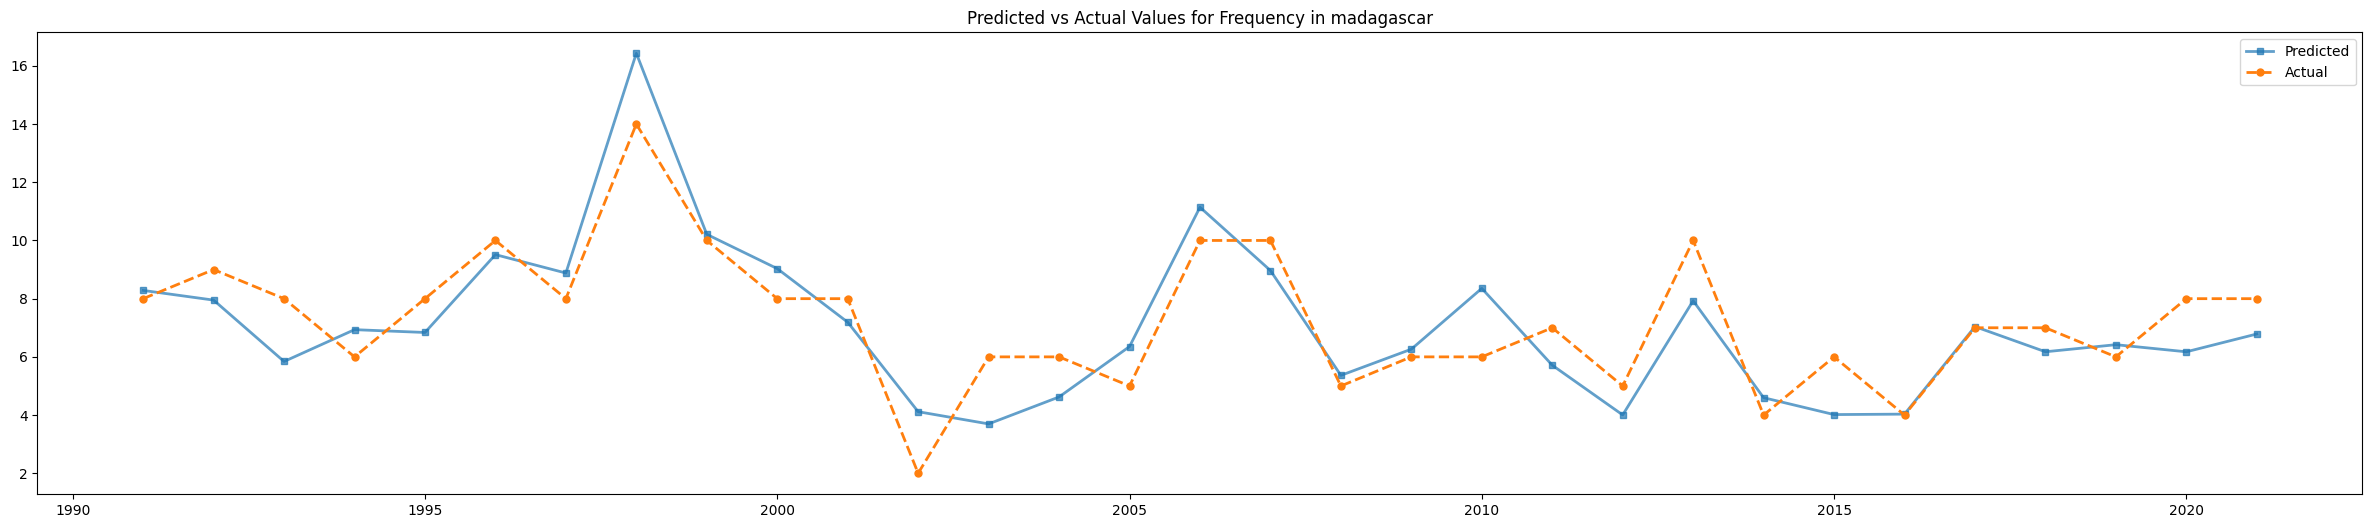

In [ ]:

# Load the predictions from the CSV file
y1_pred_df = pd.read_csv('y_pred_ANN_freq7.csv')

# Plot the predictions and actual values for y1 by country and month
countries = y1_pred_df['country'].unique()

for country in countries:
    country_pred_df = y1_pred_df[y1_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'y1_actual': 'sum', 'y1_pred': 'sum'}).reset_index()
    rmse_1 = np.sqrt(mean_squared_error(country_pred_df['y1_actual'], country_pred_df['y1_pred']))
    print("RMSE for y1:", rmse_1)
    corr = country_pred_df['y1_actual'].corr(country_pred_df['y1_pred'])
    print("Correlation for y1:", corr)
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['y1_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.plot(country_pred_df['year'], country_pred_df['y1_actual'], label="Actual", linewidth=2, linestyle='--', marker='o', markersize=5, alpha=1)
    plt.title(f"Predicted vs Actual Values for Frequency in {country}")
    plt.legend()
    plt.show()

In [ ]:
# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pickle


# Define the neural network model for predicting y2
model_2 = Sequential()
model_2.add(Dense(64, input_dim=30, activation="relu"))
model_2.add(Dense(32, activation="relu"))
model_2.add(Dense(1, activation="linear"))
model_2.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y2 and y2

y2_preds = []
y2_actuals = []
y2_test_country = []
y2_test_month = []
y2_test_year = []


# examption : 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15,'bangla' : 1
intendf = intendf[~intendf['country'].isin([1, 10, 12, 13])].reset_index(drop=True)


# Loop over each year and perform LOOCV
for year in range(1959, 2022):
    # Split the data into training and test sets based on the year
    intendf_x2_train = intendf[intendf['year'] != year].iloc[:,1:31]
    intendf_x2_test = intendf[intendf['year'] == year].iloc[:,1:31]
    intendf_y2_train = intendf[intendf['year'] != year].iloc[:,[0, 1, 33, 31]]
    intendf_y2_test = intendf[intendf['year'] == year].iloc[:,[0, 1, 33, 31]]
    
    # Train the model on the training set
    model_2.fit(intendf_x2_train, intendf_y2_train.iloc[:,3], epochs=100, batch_size=32, verbose=0)

    # Predict the output for the test set
    y2_pred = model_2.predict(intendf_x2_test)

    # Add the predictions and actual values to the respective lists
    y2_preds.extend(y2_pred)
    y2_actuals.extend(intendf_y2_test.iloc[:,3].values)
    y2_test_year.extend(intendf_y2_test.iloc[:,0].values)
    y2_test_month.extend(intendf_y2_test.iloc[:,1].values)
    y2_test_country.extend(intendf_y2_test.iloc[:,2].values)

# Convert predictions to DataFrame and concatenate with country and month columns
y2_pred_df = pd.DataFrame({"year": y2_test_year, "month": y2_test_month, "country": y2_test_country, "y2_pred": np.squeeze(y2_preds),"y2_actual": y2_actuals})
y2_pred_df = y2_pred_df[['year', 'month', 'country', 'y2_pred', 'y2_actual']]

# Save predictions to CSV file
y2_pred_df.to_csv('y_pred_ANN_inten7.csv', index=False)

import pickle

# 모델 저장
with open('model_2.pkl', 'wb') as f:
    pickle.dump(model_2, f)

# 모델 불러오기
with open('model_2.pkl', 'rb') as f:
    model_2_loaded = pickle.load(f)

KeyboardInterrupt: ignored

In [ ]:
# Load the predictions from the CSV file
y2_pred_df = pd.read_csv('y_pred_ANN_inten7.csv')

# Plot the predictions and actual values for y2 by country and month
countries = y2_pred_df['country'].unique()

for country in countries:
    country_pred_df = y2_pred_df[y2_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'y2_actual': 'sum', 'y2_pred': 'sum'}).reset_index()
    rmse_1 = np.sqrt(mean_squared_error(country_pred_df['y2_actual'], country_pred_df['y2_pred']))
    print("RMSE for y2:", rmse_1)
    corr = country_pred_df['y2_actual'].corr(country_pred_df['y2_pred'])
    print("Correlation for y2:", corr)
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['y2_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.plot(country_pred_df['year'], country_pred_df['y2_actual'], label="Actual", linewidth=2, linestyle='--', marker='o', markersize=5, alpha=1)
    plt.title(f"Predicted vs Actual Values for Intensity in {country}")
    plt.legend()
    plt.show()
